In [51]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets # 加载sklearn的数据库

In [52]:
digits = datasets.load_digits()   # 加载鸢尾花数据集
digits.keys()  #查看鸢尾花数据集中的 字典

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [53]:
digits.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [54]:
x = digits.data
y = digits.target
x.shape

(1797, 64)

In [55]:
y.shape

(1797,)

## 1.train_test_split
 拆分数据，一部分作为训练数据，一部分作为测试数据
 即获取数据的索引

In [56]:
shuffled_indexes = np.random.permutation(len(x))# 将数据集的索引打乱
shuffled_indexes

array([ 506,   84,  951, ..., 1493, 1247, 1443])

In [57]:
test_ratio = 0.2 # 测试数据集所占的比重
test_size = int(len(x) * test_ratio)  # 测试数据集的数量

In [58]:
test_indexes = shuffled_indexes[:test_size] # 测试数据集的索引
train_indexes = shuffled_indexes[test_size:] # 训练数据集的索引

In [59]:
x_train = x[train_indexes]  # 训练数据集
y_train = y[train_indexes]

In [60]:
x_test = x[test_indexes]
y_test = y[test_indexes]

##### 1-2 使用scikt-learn 中的  train_test_split

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2 ,random_state = 666)
# 设置测试数据集的分数 ， 并设置随机种子

In [63]:
print(x_train.shape)
print(x_test.shape)

(1437, 64)
(360, 64)


## 2.使用scikit-learn中的kNN,并预测结果准确度 accuracy_score 

In [64]:
from sklearn.neighbors import KNeighborsClassifier as knn
import matplotlib.pyplot as plt

In [65]:
my_knn_clf = knn(3)  #  创建knn类的对象，并设置超参数 k
my_knn_clf.fit(x_train,y_train)  # 传入训练数据，对模型进行训练

KNeighborsClassifier(n_neighbors=3)

In [66]:
y_predict = my_knn_clf.predict(x_test) # 传入测试数据，返回预测结果集

In [67]:
sum(y_predict == y_test) / len(y_test)

0.9888888888888889

##### 2-2 使用sklearn 中的accurancy_score

In [68]:
from sklearn.metrics import accuracy_score

In [81]:
accuracy_score(y_test,y_predict)

0.9888888888888889

## 3.Hyper-Parameters(超参数)

######  3-1 寻找最好的K

In [70]:
best_score = 0.0 # 初始化超参数
best_k = -1 

In [84]:
for k in range(1, 11):
    knn_clf = knn(n_neighbors=k)
    knn_clf.fit(x_train, y_train)
    score = knn_clf.score(x_test, y_test)
    if score > best_score:
        best_k = k
        best_score = score

In [85]:
print('best_k = ',best_k)
print('best_score = ',best_score)

best_k =  4
best_score =  0.9916666666666667


###### 3-2 考虑距离？不考虑距离？

In [86]:
best_score = 0.0 # 初始化超参数
best_k = -1
best_method = ""

In [88]:
for method in ["uniform", "distance"]:
    for k in range(1, 11):
        knn_clf = KNeighborsClassifier(n_neighbors=k, weights=method)
        knn_clf.fit(x_train, y_train)
        score = knn_clf.score(x_test, y_test)
        if score > best_score:
            best_k = k
            best_score = score
            best_method = method

In [89]:
print("best_method =", best_method)
print("best_k =", best_k)
print("best_score =", best_score)

best_method = uniform
best_k = 4
best_score = 0.9916666666666667


###### 3-3 搜索明可夫斯基距离相应的p
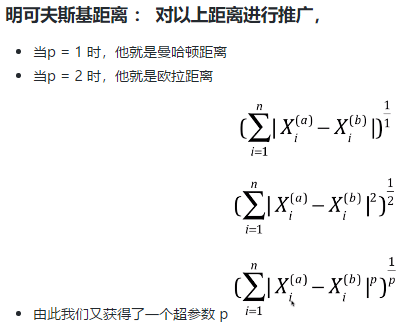

In [90]:
best_score = 0.0 # 初始化超参数
best_k = -1
best_p = -1

In [92]:
for k in range(1, 11):
    for p in range(1, 6):
        knn_clf = KNeighborsClassifier(n_neighbors=k, weights="distance", p=p)
        knn_clf.fit(x_train, y_train)
        score = knn_clf.score(x_test, y_test)
        if score > best_score:
            best_k = k
            best_p = p
            best_score = score

In [93]:
print("best_k =", best_k)
print("best_p =", best_p)
print("best_score =", best_score)

best_k = 3
best_p = 2
best_score = 0.9888888888888889


## 4 网格搜索（grid search）：sklearn 为我们封装了以上方法 ，来寻找超参数

In [114]:
param_grid = [        # 初始化网格搜索的范围
    {
        'weights': ['uniform'], 
        'n_neighbors': [i for i in range(1, 11)]
    },
    {
        'weights': ['distance'],
        'n_neighbors': [i for i in range(1, 11)], 
        'p': [i for i in range(1, 6)]
    }
]

In [115]:
knn_clf = KNeighborsClassifier()

In [116]:
from sklearn.model_selection import GridSearchCV # 导入网格搜索库

In [117]:
grid_search = GridSearchCV(knn_clf, param_grid)  
# 创建类的对象，并传入网格搜索的参数

In [118]:
%%time
grid_search.fit(x_train, y_train)   # 传入训练数据

Wall time: 49.1 s


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}])

In [119]:
grid_search.best_estimator_  # 输出网格收索的结果

KNeighborsClassifier(n_neighbors=1)

In [120]:
grid_search.best_score_

0.9860820751064653

In [121]:
%%time
grid_search = GridSearchCV(knn_clf, param_grid, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 170 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 269 out of 300 | elapsed:    7.1s remaining:    0.7s


Wall time: 8.1 s


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    8.0s finished


GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'weights': ['uniform']},
                         {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'p': [1, 2, 3, 4, 5], 'weights': ['distance']}],
             verbose=2)

## 5 数据归一化处理（Feature-Scaling）
### sklearn 中的StandarScaler

###### 5-1 最值归一化:  适用于分布有明显边界的情况；受outlier影响较⼤大
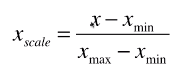

In [126]:
X = np.random.randint(0, 100, (50, 2))
X = np.array(X, dtype=float)
X[:10,:]

array([[50., 23.],
       [ 9., 72.],
       [80., 85.],
       [24., 81.],
       [92., 20.],
       [64., 66.],
       [39., 30.],
       [76., 40.],
       [53., 13.],
       [69., 53.]])

In [127]:
X[:,0] = (X[:,0] - np.min(X[:,0])) / (np.max(X[:,0]) - np.min(X[:,0]))
X[:,1] = (X[:,1] - np.min(X[:,1])) / (np.max(X[:,1]) - np.min(X[:,1]))
X[:10,:]

array([[0.5       , 0.23232323],
       [0.06382979, 0.72727273],
       [0.81914894, 0.85858586],
       [0.22340426, 0.81818182],
       [0.94680851, 0.2020202 ],
       [0.64893617, 0.66666667],
       [0.38297872, 0.3030303 ],
       [0.77659574, 0.4040404 ],
       [0.53191489, 0.13131313],
       [0.70212766, 0.53535354]])

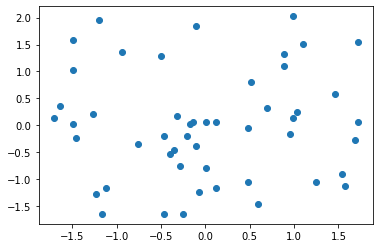

In [132]:
plt.scatter(X[:,0], X[:,1])
plt.show()

#####  5-2 均值方差归一化 ：数据分布没有明显的边界；有可能存在极端数据值
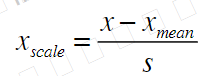

In [129]:
X[:,0] = (X[:,0] - np.mean(X[:,0])) / np.std(X[:,0])
X[:,1] = (X[:,1] - np.mean(X[:,1])) / np.std(X[:,1])

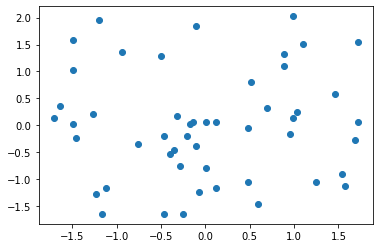

In [131]:
plt.scatter(X[:,0], X[:,1])
plt.show()

###### 5-3 sklearn 中的StanderScaler 

In [147]:
from sklearn.preprocessing import StandardScaler  # 导入StanderScaler库
standardScaler = StandardScaler() # 创建StandarScaler 类的对象

In [148]:
standardScaler.fit(x_train)

StandardScaler()

In [150]:
standardScaler.mean_

array([0.00000000e+00, 3.15240084e-01, 5.22338205e+00, 1.18733473e+01,
       1.18030619e+01, 5.77174669e+00, 1.40709812e+00, 1.48921364e-01,
       4.87125957e-03, 1.91788448e+00, 1.03096729e+01, 1.19860821e+01,
       1.02651357e+01, 8.03131524e+00, 1.85455811e+00, 1.23869172e-01,
       2.08768267e-03, 2.54766875e+00, 9.88239388e+00, 7.04592902e+00,
       7.07446068e+00, 7.70702853e+00, 1.76478775e+00, 5.14961726e-02,
       6.95894224e-04, 2.48155880e+00, 9.21642310e+00, 8.95963814e+00,
       9.94015310e+00, 7.55741127e+00, 2.28810021e+00, 2.08768267e-03,
       0.00000000e+00, 2.35003479e+00, 7.67501740e+00, 9.07863605e+00,
       1.02922756e+01, 8.70354906e+00, 2.87265136e+00, 0.00000000e+00,
       4.87125957e-03, 1.53305498e+00, 6.83298539e+00, 7.16771051e+00,
       7.67710508e+00, 8.13639527e+00, 3.41684064e+00, 2.99234516e-02,
       3.47947112e-03, 6.84064022e-01, 7.48503827e+00, 9.61795407e+00,
       9.41127349e+00, 8.72442589e+00, 3.69589422e+00, 2.08768267e-01,
      

In [151]:
standardScaler.scale_

array([1.        , 0.94017138, 4.78742949, 4.26578278, 4.36785137,
       5.72381836, 3.4005247 , 1.13590446, 0.08735621, 3.12334135,
       5.39821329, 3.98219084, 4.81472915, 6.02416791, 3.64715527,
       0.90230945, 0.04564345, 3.57385393, 5.75969272, 5.80493447,
       6.17575076, 6.22002395, 3.24573466, 0.45705578, 0.02637063,
       3.15156027, 6.17826642, 5.88368225, 6.1593801 , 5.89885246,
       3.65098118, 0.04564345, 1.        , 3.46861186, 6.32616338,
       6.2616413 , 5.88164669, 5.88427672, 3.50937656, 1.        ,
       0.11488369, 2.89958122, 6.56268508, 6.39026431, 6.27507783,
       5.70299867, 4.35525043, 0.32492523, 0.08742271, 1.74277813,
       5.65260413, 5.17039218, 5.31852093, 6.03601305, 4.90934559,
       0.99314614, 0.02637063, 0.9760154 , 5.13873533, 4.39278311,
       5.01053642, 5.94560353, 4.13685277, 1.8962889 ])

In [152]:
X_train = standardScalar.transform(x_train)

In [153]:
X_train[:10,:]

array([[ 0.00000000e+00, -3.35300658e-01,  1.62220239e-01,
         2.96903887e-02,  7.31924645e-01,  5.64003450e-01,
        -1.19716266e-01, -1.31103776e-01, -5.57631748e-02,
         9.86800727e-01,  6.83620093e-01, -2.00544937e+00,
        -1.09354764e+00,  1.32278596e+00,  3.14064471e-01,
        -1.37280145e-01, -4.57389354e-02,  1.80542668e+00,
        -3.26821927e-01, -6.96980998e-01,  9.59484854e-01,
         1.33327002e+00,  6.88661422e-01, -1.12669338e-01,
        -2.63889907e-02,  1.64503025e-01,  9.36116461e-01,
         1.02662952e+00, -4.77345617e-01,  4.14078627e-01,
         1.56448350e+00, -4.57389354e-02,  0.00000000e+00,
        -6.77514489e-01, -1.21321833e+00, -1.29017867e+00,
        -1.74989695e+00,  5.60213446e-01,  1.46104260e+00,
         0.00000000e+00, -4.24016654e-02, -5.28715997e-01,
        -1.04118746e+00, -1.12166104e+00, -1.22342787e+00,
         5.02122637e-01, -3.25317835e-01, -9.20933468e-02,
        -3.98005419e-02, -3.92513545e-01, -8.58079326e-0

In [155]:
X_test_standard = standardScalar.transform(x_test) 

In [156]:
X_test_standard[:10,:]

array([[ 0.00000000e+00, -3.35300658e-01, -2.55540483e-01,
         9.67384643e-01,  5.02979126e-01, -4.84247843e-01,
        -4.13788531e-01, -1.31103776e-01,  2.28390032e+01,
         3.86833015e+00,  1.05411305e+00,  3.49503202e-03,
        -5.50676250e-02,  4.92795819e-01, -5.08494421e-01,
        -1.37280145e-01, -4.57389354e-02,  2.92466660e+00,
         3.67659566e-01,  3.36622401e-01,  1.28333212e+00,
         3.68643511e-01, -5.43725207e-01, -1.12669338e-01,
        -2.63889907e-02,  1.64503025e-01,  7.74258760e-01,
         8.56667926e-01,  9.83840387e-01, -6.03068359e-01,
        -6.26708301e-01, -4.57389354e-02,  0.00000000e+00,
        -6.77514489e-01,  2.09444891e-01,  1.10535938e+00,
        -3.89733640e-01, -1.47911961e+00, -8.18564581e-01,
         0.00000000e+00, -4.24016654e-02, -5.28715997e-01,
         7.87332403e-01,  1.22565971e+00,  1.00762016e+00,
        -1.25134086e+00, -7.84533679e-01, -9.20933468e-02,
        -3.98005419e-02, -3.92513545e-01,  7.98740125e-0

In [157]:
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [158]:
knn_clf.score(X_test_standard, y_test)

0.9777777777777777

##### 注意： 此时不能传入没有归一化的数据

In [160]:
knn_clf.score(x_test, y_test)

0.7722222222222223